In [2]:
import os
import pickle
import numpy as np
import torch
import gym
import load_policy_pytorch


import numpy as np
import pandas as pd
import os
import glob
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

eps = np.finfo(float).eps

plt.rcParams['figure.figsize'] = 10, 10
%matplotlib inline


%load_ext autoreload
%autoreload 2

In [12]:
with open(os.path.join('expert_data', 'Humanoid-v2' + '.pkl'), 'rb') as f:
    expert_data = pickle.load(f)

In [13]:
list(expert_data)

['observations', 'actions']

In [14]:
expert_data['observations'].shape

(500, 376)

In [15]:
expert_data['actions'].shape

(500, 1, 17)

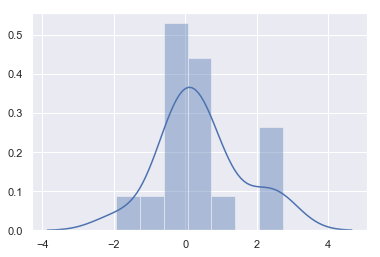

In [24]:
sns.set()
sns.distplot(expert_data['actions'][0, :])

In [25]:
inps = torch.from_numpy(expert_data['observations'])
tgts = torch.from_numpy(expert_data['actions'])

In [27]:
inps.size(1)

376

In [ ]:
torch.FloatTensor